In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv
import cv2
import numpy as np
%matplotlib inline

In [2]:
lines = []
with open('../data/driving_log_part1.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

idx = np.random.randint(0, len(lines))
idx

3989

(160, 320, 3)


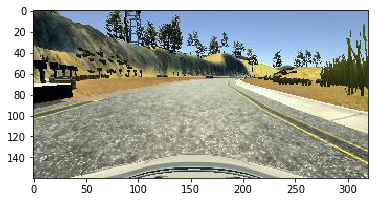

In [13]:
source_path = lines[idx][0]
filename = source_path.split('/')[-1]
current_path = '../data/IMG_part1/' + filename
image = cv2.imread(current_path)
print(image.shape)
my_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(my_img)
plt.savefig('images/flip_img1.png')
plt.show()

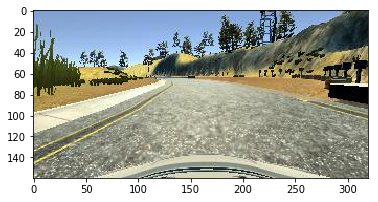

In [14]:
my_flip_img = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
plt.imshow(my_flip_img)
plt.savefig('images/flip_img2.png')
plt.show()

In [15]:
from keras import backend as K
from keras.layers.convolutional import Cropping2D
from keras.models import Sequential

model = Sequential()
model.add(Cropping2D(cropping=((50, 20), (0, 0)), input_shape=(160, 320, 3)))
cropping_output = K.function([model.layers[0].input], [model.layers[0].output])
cropped_image = cropping_output([image[None,...]])[0]

Using TensorFlow backend.


In [27]:
cropped_image = np.uint8(cropped_image.squeeze())
cropped_image.shape

(90, 320, 3)

In [28]:
np.uint8(cropped_image)

array([[[ 35,  39,  27],
        [  0,   4,   0],
        [  3,   7,   1],
        ..., 
        [ 39,  82,  69],
        [ 38,  82,  69],
        [ 21,  65,  52]],

       [[ 55,  56,  46],
        [  3,   6,   0],
        [  4,   5,   1],
        ..., 
        [ 26,  68,  57],
        [ 22,  68,  56],
        [  7,  53,  41]],

       [[  0,   3,   0],
        [ 38,  40,  34],
        [ 19,  20,  18],
        ..., 
        [ 30,  73,  62],
        [ 25,  71,  59],
        [ 23,  71,  59]],

       ..., 
       [[114, 128, 126],
        [123, 137, 135],
        [151, 165, 163],
        ..., 
        [ 64,  65,  69],
        [111, 100, 110],
        [ 88,  70,  83]],

       [[115, 129, 127],
        [125, 139, 137],
        [145, 159, 157],
        ..., 
        [ 59,  64,  67],
        [ 85,  88,  93],
        [ 64,  64,  70]],

       [[216, 230, 228],
        [188, 202, 200],
        [161, 175, 173],
        ..., 
        [ 87,  92,  93],
        [ 86,  96,  96],
        [ 70,  82,

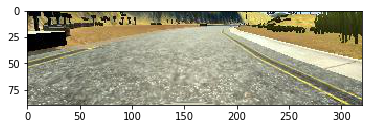

In [29]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.savefig('images/cropped_img.png')
plt.show()